# COVID-19 OWID testing data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import featuretools as ft
from sklearn.model_selection import train_test_split

In [2]:
# For plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
# To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

Read the dataset given to us using pandas :

In [110]:
df = pd.read_csv("owid-covid-data.csv")
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [100]:
df1.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

Now, we are subsetting the data to get only the rows which have location India.

In [4]:
df1=df[df.location == 'India']
df1

In [5]:
df1

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
12441,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12442,IND,Asia,India,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12443,IND,Asia,India,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12444,IND,Asia,India,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12445,IND,Asia,India,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12446,IND,Asia,India,2020-01-05,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12447,IND,Asia,India,2020-01-06,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12448,IND,Asia,India,2020-01-07,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12449,IND,Asia,India,2020-01-08,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12450,IND,Asia,India,2020-01-09,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [6]:
df1.shape # The data set that we are now going to work with has 194 rows and 34 feature columns.

(194, 34)

Given below is the statistical analysis by describe() method of the feature columns

In [7]:
df1.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,1.090000e+02,103.000000,...,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02,1.940000e+02
mean,115713.649485,4379.139175,3412.994845,116.876289,83.850144,3.173284,2.473186,0.084680,3.373111e+06,108467.126214,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
std,203259.271459,6903.872160,5884.891347,206.615397,147.288872,5.002787,4.264405,0.149673,3.315997e+06,76183.121448,...,9.350002e-15,1.823696e-11,7.480002e-14,7.408764e-13,4.274287e-14,4.229763e-15,6.411430e-14,1.139810e-13,8.904764e-16,1.139810e-13
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.500000e+03,157.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
25%,3.000000,0.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,4.015860e+05,40878.500000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
50%,4244.000000,584.500000,111.500000,16.000000,3.075500,0.424000,0.081000,0.011500,2.302792e+06,100180.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
75%,137100.750000,6558.250000,3982.500000,156.250000,99.348000,4.752250,2.886000,0.113500,5.658614e+06,150868.500000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
max,849553.000000,28637.000000,22674.000000,2003.000000,615.616000,20.751000,16.430000,1.451000,1.130700e+07,283659.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01


Given below are the datatypes for each column.

In [8]:
df1.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

In [9]:
df1.apply(lambda x: len(x.unique()))

iso_code                             1
continent                            1
location                             1
date                               194
total_cases                        135
new_cases                          128
total_deaths                       116
new_deaths                         100
total_cases_per_million            133
new_cases_per_million              126
total_deaths_per_million           115
new_deaths_per_million              93
total_tests                        110
new_tests                          104
total_tests_per_thousand           107
new_tests_per_thousand              76
new_tests_smoothed                 114
new_tests_smoothed_per_thousand     92
tests_units                          2
stringency_index                    22
population                           1
population_density                   1
median_age                           1
aged_65_older                        1
aged_70_older                        1
gdp_per_capita           

In [10]:
# Dropping the columns with unique value of 1 , that is the whole column is constant and wont affect our prediction

In [11]:
#df1=df1.drop(['iso_code', 'continent','population','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cvd_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy'], axis = 1)

In [12]:
df1

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
12441,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12442,IND,Asia,India,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12443,IND,Asia,India,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12444,IND,Asia,India,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12445,IND,Asia,India,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12446,IND,Asia,India,2020-01-05,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12447,IND,Asia,India,2020-01-06,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12448,IND,Asia,India,2020-01-07,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12449,IND,Asia,India,2020-01-08,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12450,IND,Asia,India,2020-01-09,0.0,0.0,0.0,0.0,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


Checking for null values.


In [13]:
df1.isnull().sum()

iso_code                            0
continent                           0
location                            0
date                                0
total_cases                         0
new_cases                           0
total_deaths                        0
new_deaths                          0
total_cases_per_million             0
new_cases_per_million               0
total_deaths_per_million            0
new_deaths_per_million              0
total_tests                        85
new_tests                          91
total_tests_per_thousand           85
new_tests_per_thousand             91
new_tests_smoothed                 80
new_tests_smoothed_per_thousand    80
tests_units                        73
stringency_index                    3
population                          0
population_density                  0
median_age                          0
aged_65_older                       0
aged_70_older                       0
gdp_per_capita                      0
extreme_pove

<h3>Univariate Analysis</h3>

Calculating the median of the numerical columns and then filling in the null values and plotting it.

In [14]:
df1['total_tests'].mean()


3373110.9449541285

In [15]:
df1['total_tests'].fillna(3373110.9449541285, inplace =True)

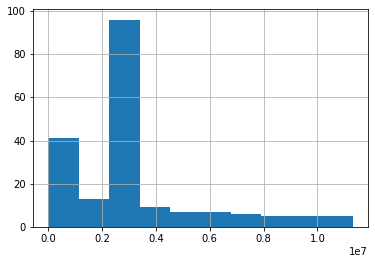

In [16]:
df1['total_tests'].hist()

The above graph suggests that it took us 42 days to reach the total test count to 10^6.

In [17]:
df1['new_tests'].mean()

108467.12621359223

In [18]:
df1['new_tests'].fillna(108467.12621359223, inplace =True)

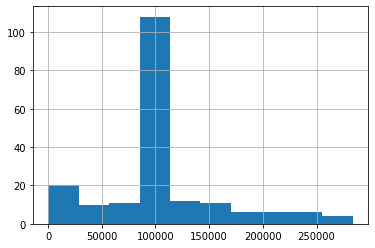

In [19]:
df1['new_tests'].hist()

It took around 20 days for the new_tests to reach 25000.

In [20]:
df1['new_tests_per_thousand'].mean()

0.07859223300970876

In [21]:
df1['new_tests_per_thousand'].fillna(0.07859223300970876, inplace =True)

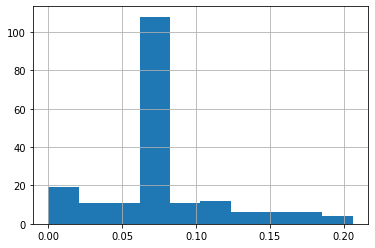

In [22]:
df1['new_tests_per_thousand'].hist()

It took around 19 days for the new_tests_per_thousand to reach 0.02.

In [23]:
df1['total_tests_per_thousand'].mean()

2.4443119266055042

In [24]:
df1['total_tests_per_thousand'].fillna(2.4443119266055042, inplace =True)

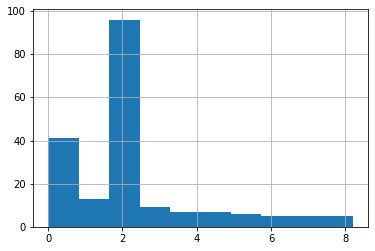

In [25]:
df1['total_tests_per_thousand'].hist()

In [26]:
df1['new_tests_smoothed'].mean()

92034.71929824562

In [27]:
df1['new_tests_smoothed'].fillna(92034.71929824562, inplace =True)

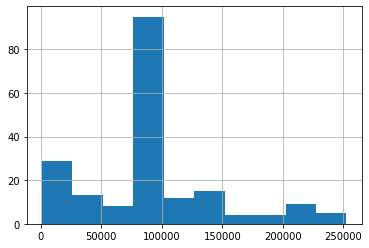

In [28]:
df1['new_tests_smoothed'].hist()

It took around 30 days for the new_tests_smoothed to reach 25000.

In [29]:
df1['new_tests_smoothed_per_thousand'].mean()

0.0666929824561404

In [30]:
df1['new_tests_smoothed_per_thousand'].fillna(0.0666929824561404, inplace =True)

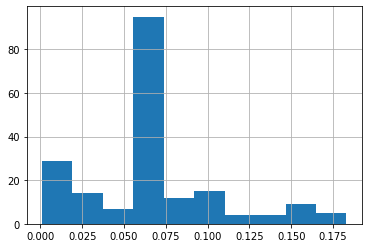

In [31]:
df1['new_tests_smoothed_per_thousand'].hist()

It took around 30 days for the new_tests_smoothed_per_thousand to reach 25000.

In [32]:
df1['stringency_index'].mean()

55.30900523560205

In [33]:
df1['stringency_index'].fillna(55.620618556700975, inplace =True)

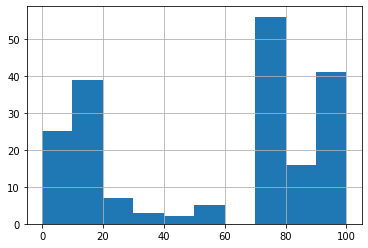

In [34]:
df1['stringency_index'].hist()

It took around 25 days for the stringency index to reach 10.

In [35]:
df1.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

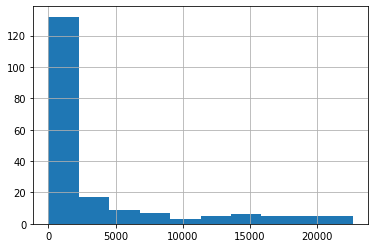

In [36]:
df1['total_deaths'].hist()

It took around 134 days for the total_deaths to reach 2500.

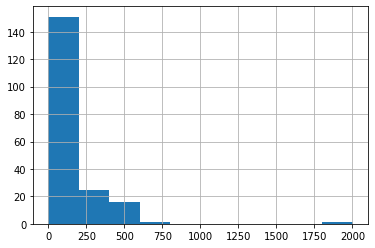

In [37]:
df1['new_deaths'].hist()

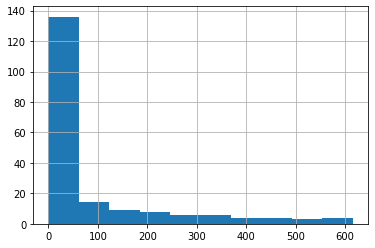

In [38]:
df1['total_cases_per_million'].hist()

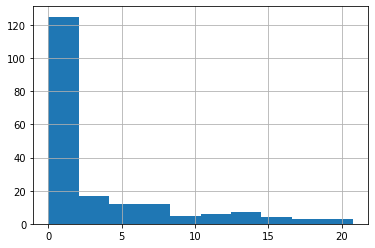

In [39]:
df1['new_cases_per_million'].hist()

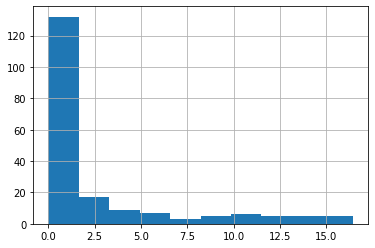

In [40]:
df1['total_deaths_per_million'].hist()

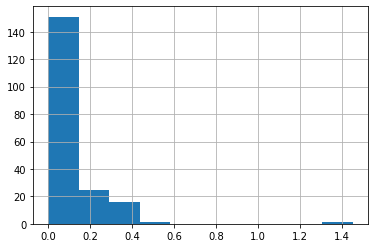

In [41]:
df1['new_deaths_per_million'].hist()

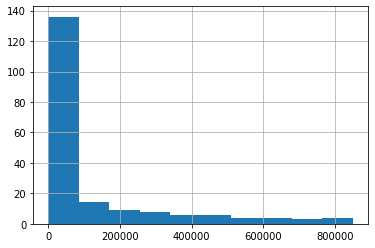

In [42]:
df1['total_cases'].hist()

It took around 138 days to reach 100000.

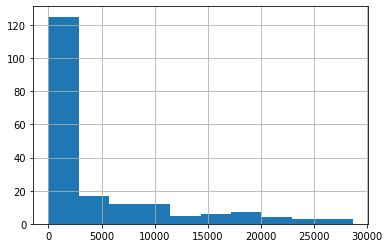

In [43]:
df1['new_cases'].hist()

In [44]:
df1=df1.drop(['location','tests_units'],axis=1)
df1

,iso_code,continent,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
12441,IND,Asia,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12442,IND,Asia,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12443,IND,Asia,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12444,IND,Asia,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12445,IND,Asia,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12446,IND,Asia,2020-01-05,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12447,IND,Asia,2020-01-06,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12448,IND,Asia,2020-01-07,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12449,IND,Asia,2020-01-08,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12450,IND,Asia,2020-01-09,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


<h3> Bivariate Analysis </h3>

In [46]:
import seaborn as sns

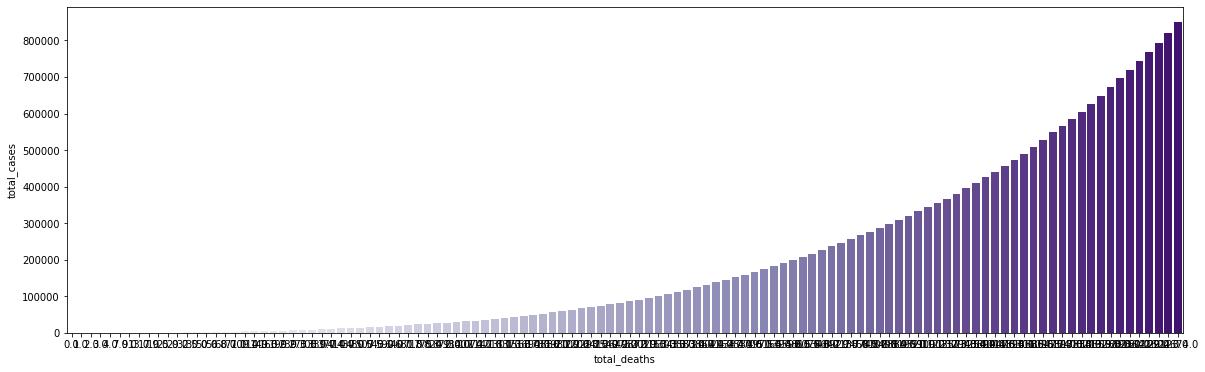

In [47]:
plt.figure(figsize=(20,6))
sns.barplot(x=df1["total_deaths"], y=df1["total_cases"],palette="Purples")

Here, we can observe that the total number of deaths is steadily increasing with the total number of cases.

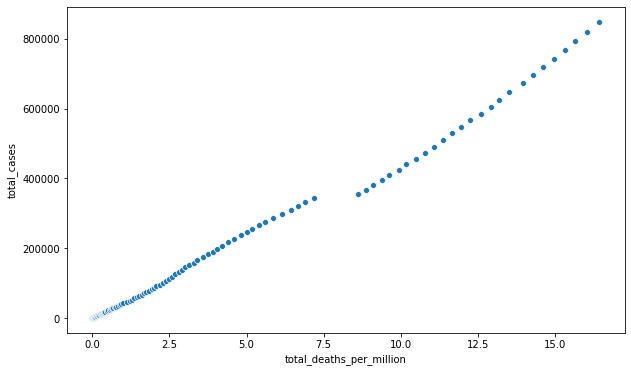

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df1["total_deaths_per_million"], y=df1["total_cases"],palette="Reds")

As we can observe in the scatter plot above the total_deaths_per_million increases with total_cases.

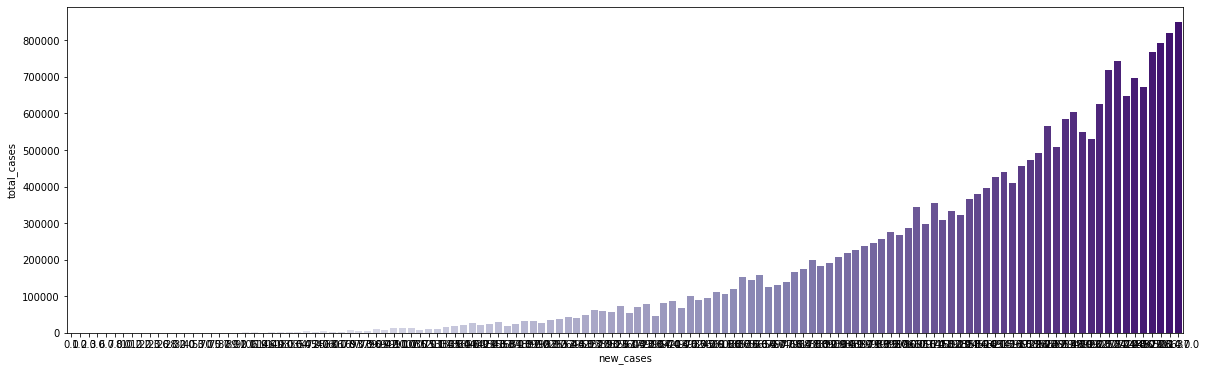

In [49]:
plt.figure(figsize=(20,6))
sns.barplot(x=df1["new_cases"],y=df1["total_cases"],palette="Purples")

For the above graph with new_cases VS total_cases the trend is increasing only but on certain days the new cases on the day before is more than the day after. 

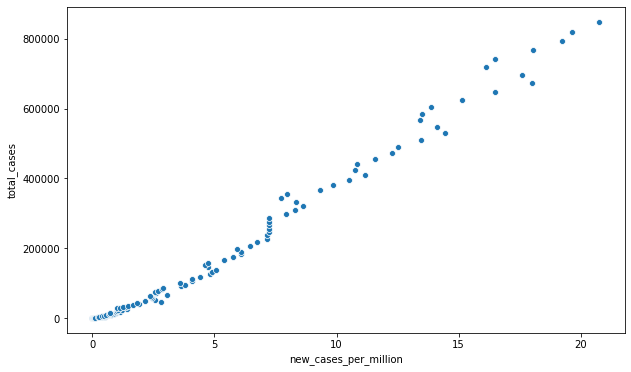

In [50]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df1["new_cases_per_million"],y=df1["total_cases"],palette="rocket")

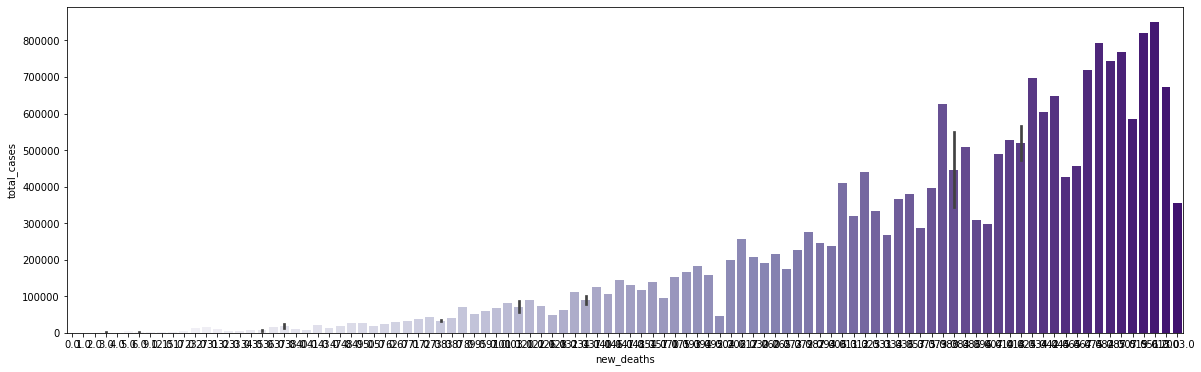

In [51]:
plt.figure(figsize=(20,6))
sns.barplot(x=df1["new_deaths"],y=df1["total_cases"],palette="Purples")

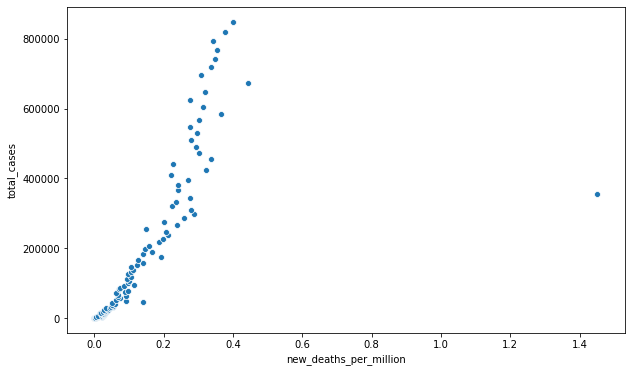

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df1["new_deaths_per_million"],y=df1["total_cases"],palette="rocket")

In comparision to the graph of new cases, the new deaths is increasing but not in the same ratio as that of the new cases, which means the death rate of India is very less in comparision to the number of new cases we are getting everyday.

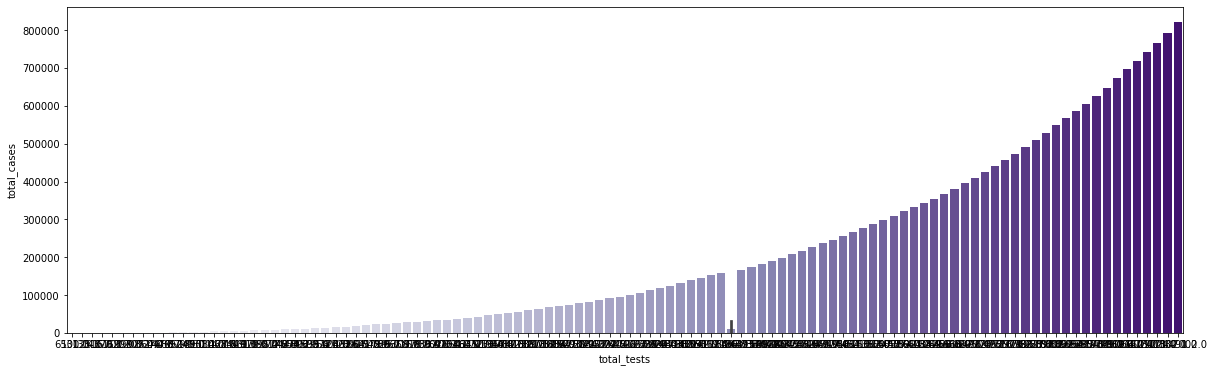

In [53]:
plt.figure(figsize=(20,6))
sns.barplot(x=df1["total_tests"],y=df1["total_cases"],palette="Purples")

The total number of tests is rapidly increasing with the increase of total number of cases.

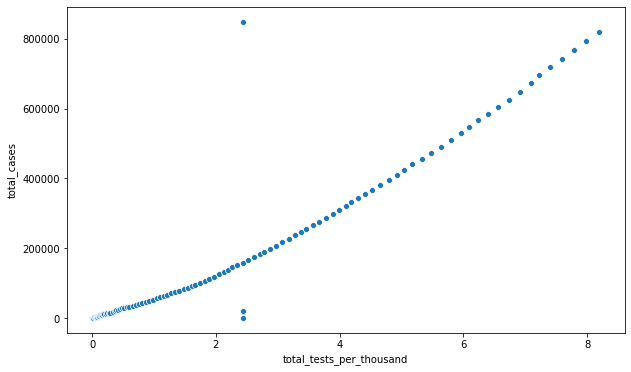

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df1["total_tests_per_thousand"],y=df1["total_cases"],palette="rocket")

The total number of tests per thousand is increasing rapidly with total cases.

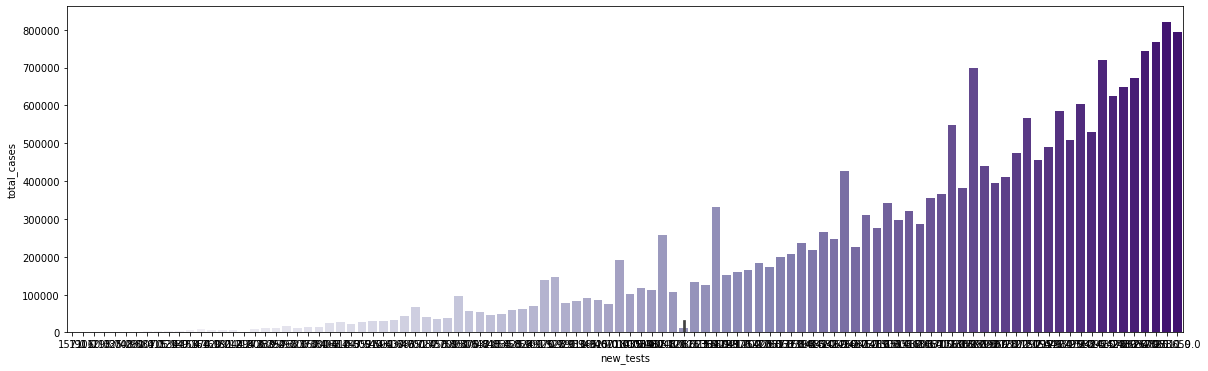

In [55]:
plt.figure(figsize=(20,6))
sns.barplot(x=df1["new_tests"],y=df1["total_cases"],palette="Purples")

New tests also has a rising trend but with certain irregularities , on particular days the new tests are more on the previous day.

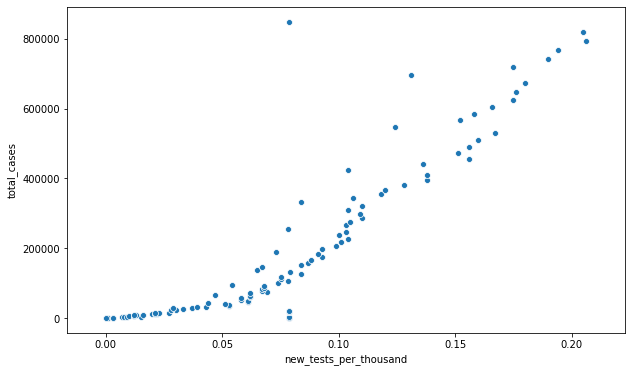

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df1["new_tests_per_thousand"],y=df1["total_cases"],palette="rocket")

New tests per thousand also has a rising trend with the increase in total number of cases.

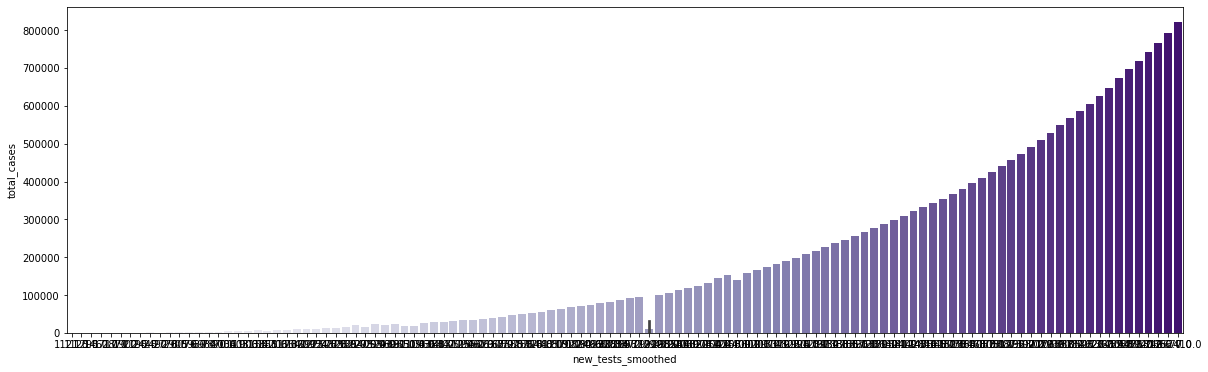

In [57]:
plt.figure(figsize=(20,6))
sns.barplot(x=df1["new_tests_smoothed"],y=df1["total_cases"],palette="Purples")

New tests smoothed increasing with the total number of cases.

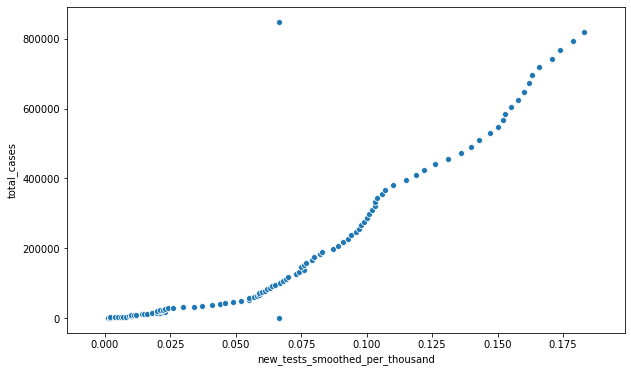

In [101]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df1["new_tests_smoothed_per_thousand"],y=df1["total_cases"],palette="Purples")

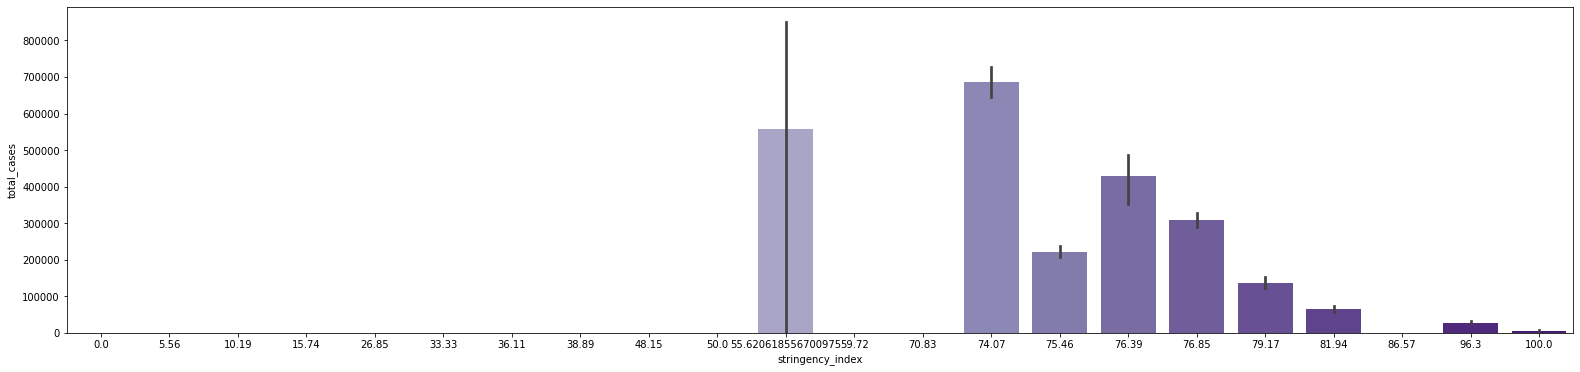

In [59]:
plt.figure(figsize=(27,6))
sns.barplot(x=df1["stringency_index"],y=df1["total_cases"],palette="Purples")

Coverting date into ordinal value

In [60]:
import datetime as dt 
df1["date"]=pd.to_datetime(df1["date"]) 
df1["date"]=df1["date"].map(dt.datetime.toordinal) 


In [61]:
df_new=df1._get_numeric_data()

In [62]:
df_new.shape

(194, 30)

In [63]:
df_new.columns

Index(['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million', 'total_tests',
       'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [64]:
df1=df1.drop(['iso_code', 'continent','population','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cvd_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy'], axis = 1)

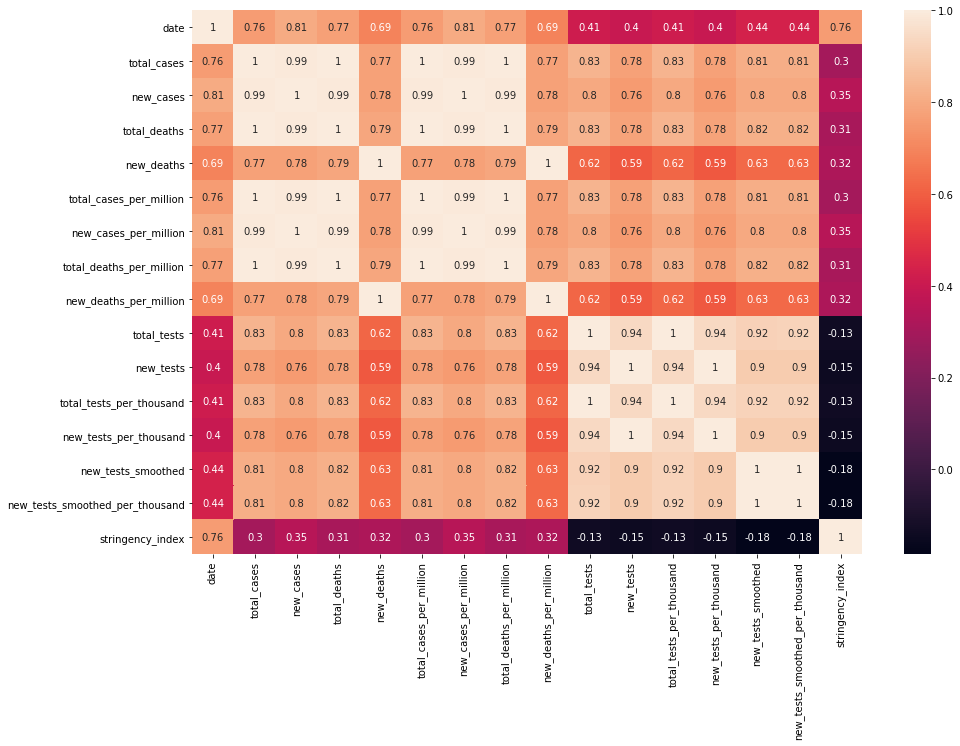

In [65]:
fig=plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), annot=True)

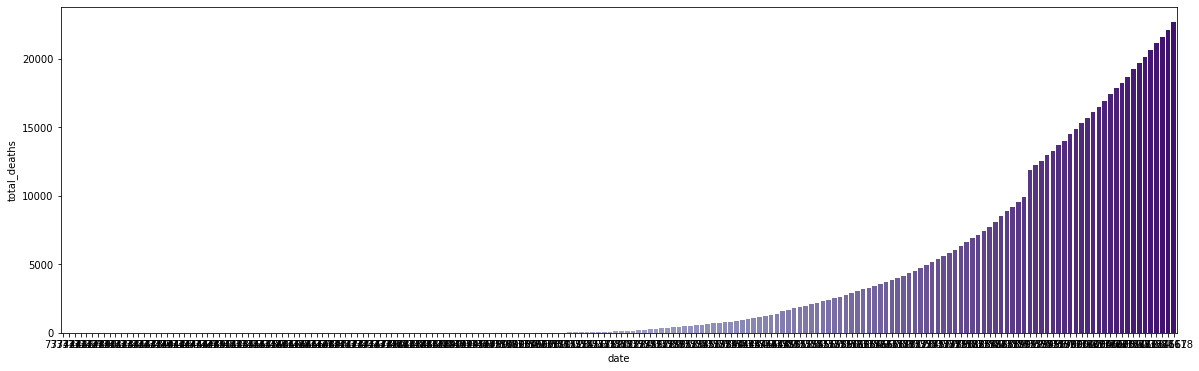

In [66]:
plt.figure(figsize=(20,6))
sns.barplot(x=df1["date"], y=df1["total_deaths"],palette="Purples")

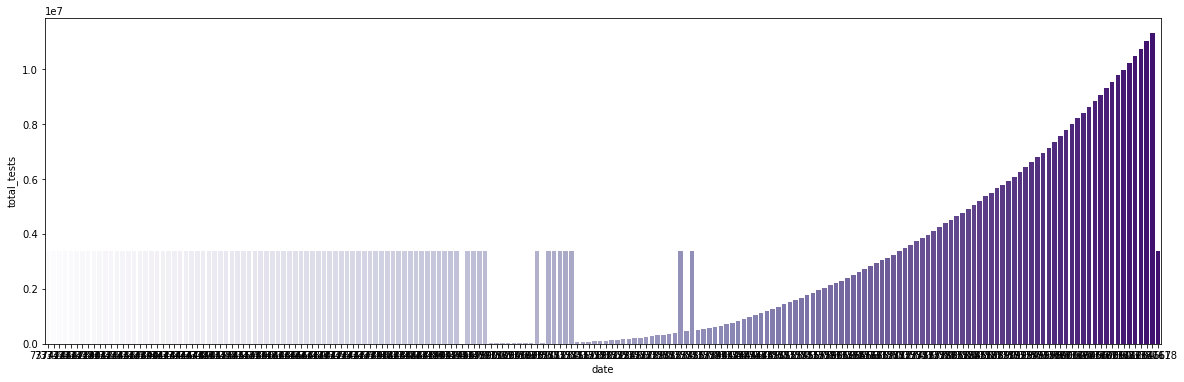

In [67]:
plt.figure(figsize=(20,6))
sns.barplot(x=df1["date"], y=df1["total_tests"],palette="Purples")

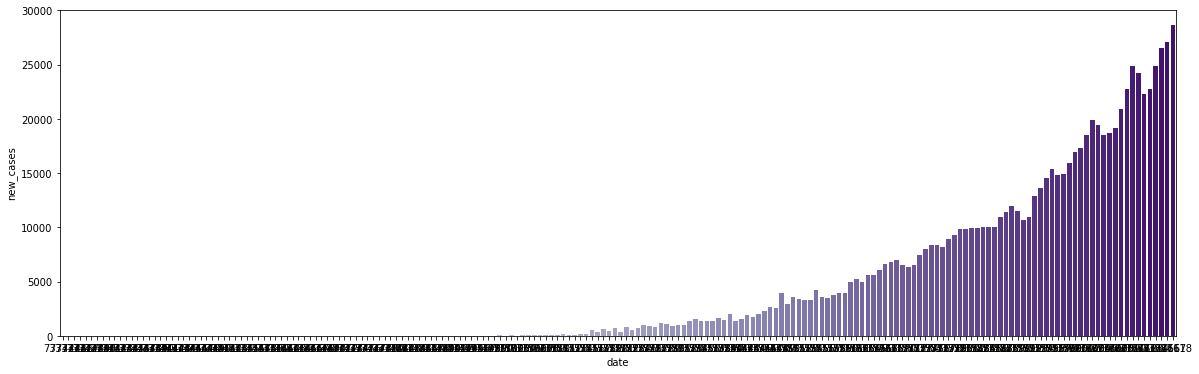

In [68]:
plt.figure(figsize=(20,6))
sns.barplot(x=df1["date"], y=df1["new_cases"],palette="Purples")

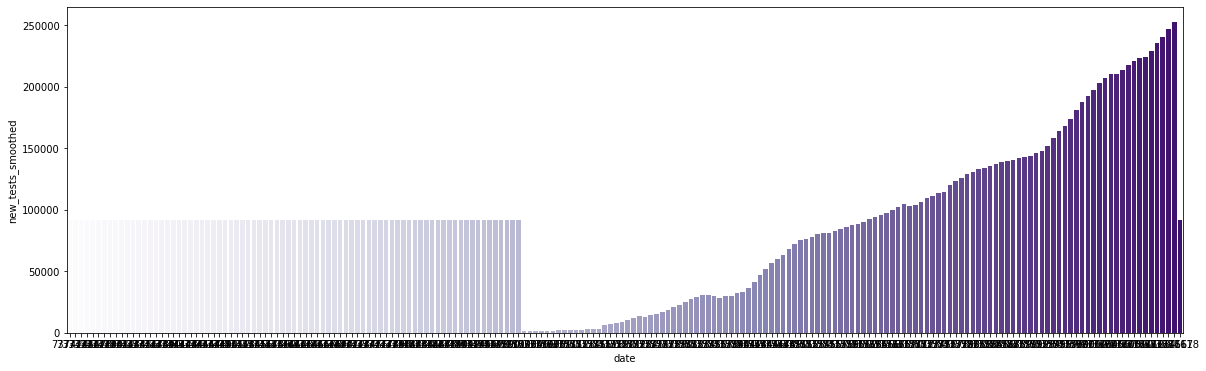

In [69]:
plt.figure(figsize=(20,6))
sns.barplot(x=df1["date"], y=df1["new_tests_smoothed"],palette="Purples")

All the categorical columns have been dropped and the date has been coverted to ordinal time , so we can move towards model building.

In [70]:
df1.isnull().sum()

date                               0
total_cases                        0
new_cases                          0
total_deaths                       0
new_deaths                         0
total_cases_per_million            0
new_cases_per_million              0
total_deaths_per_million           0
new_deaths_per_million             0
total_tests                        0
new_tests                          0
total_tests_per_thousand           0
new_tests_per_thousand             0
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
stringency_index                   0
dtype: int64

In [104]:
df1.date

12441    737424
12442    737425
12443    737426
12444    737427
12445    737428
12446    737429
12447    737430
12448    737431
12449    737432
12450    737433
12451    737434
12452    737435
12453    737436
12454    737437
12455    737438
12456    737439
12457    737440
12458    737441
12459    737442
12460    737443
12461    737444
12462    737445
12463    737446
12464    737447
12465    737448
12466    737449
12467    737450
12468    737451
12469    737452
12470    737453
          ...  
12605    737589
12606    737590
12607    737591
12608    737592
12609    737593
12610    737594
12611    737595
12612    737596
12613    737597
12614    737598
12615    737599
12616    737600
12617    737601
12618    737602
12619    737603
12620    737604
12621    737605
12622    737606
12623    737607
12624    737608
12625    737609
12626    737610
12627    737611
12628    737612
12629    737613
12630    737614
12631    737615
12632    737616
12633    737617
12634    737618
Name: date, Length: 194,

In [72]:
df1.columns

Index(['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
       'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million', 'total_tests',
       'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'stringency_index'],
      dtype='object')

<h3> Model Building </h3>

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
train,test=train_test_split(df1, test_size= 0.2)

In [75]:
y_train=train['total_cases'].values
X_train=train.drop(['total_cases'],axis=1).values

In [76]:
y_test=test['total_cases'].values
X_test=test.drop(['total_cases'],axis=1).values

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
from sklearn import metrics

In [79]:
reg=LinearRegression()

In [80]:
reg.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
y_pred=reg.predict(X_test)

In [82]:
print(y_pred)

[2.85950420e+00 1.51767510e+05 2.90482559e+00 7.07556579e+04
 4.90401029e+05 3.43091486e+05 5.19435296e+03 1.25177767e+03
 8.92890408e-02 4.64331843e+04 1.39671747e+03 5.04421324e-02
 2.92101180e+00 8.73639193e+02 4.39676477e-02 4.40214380e+05
 2.88863938e+00 9.09271699e+04 2.30643066e+02 3.13316790e+04
 5.69166171e-02 1.25101532e+05 1.82142698e+05 3.54067828e+05
 1.45379434e+05 2.13928507e+04 5.08952254e+05 7.95773137e-02
 2.87569041e+00 5.63415495e+04 1.98705606e+05 6.29394014e+04
 1.07105542e+03 2.07614935e+05 4.42161961e+03 8.60517984e-02
 8.35601171e+03 4.56182618e+05 1.57114705e+04]


In [83]:
reg.score(X_test,y_test)

0.9999999999857925

In [84]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.36050125660909915
MSE: 0.33865373728450326
RMSE: 0.5819396337116963


In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1,20,2)),'n_estimators':list(range(1,200,20))}
grid_search = GridSearchCV(RandomForestRegressor(random_state=1),paramgrid)
grid_search.fit(X_train,y_train)
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [87]:
ranf=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [88]:
ranf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [89]:
y_pred=ranf.predict(X_test)

In [90]:
print(y_pred)

[1.60298507e+01 1.38845000e+05 1.60298507e+01 7.42810000e+04
 4.73105000e+05 3.80532000e+05 6.41200000e+03 2.30100000e+03
 1.60298507e+01 3.99800000e+04 2.30100000e+03 1.60298507e+01
 1.60298507e+01 5.57166667e+02 1.60298507e+01 4.25282000e+05
 1.60298507e+01 9.61690000e+04 1.60298507e+01 3.30500000e+04
 1.60298507e+01 1.06750000e+05 1.58333000e+05 3.80532000e+05
 1.38845000e+05 1.99840000e+04 5.28859000e+05 1.60298507e+01
 1.60298507e+01 5.29520000e+04 2.16919000e+05 7.42810000e+04
 5.57166667e+02 2.16919000e+05 2.90200000e+03 1.60298507e+01
 1.03630000e+04 4.73105000e+05 1.43780000e+04]


In [91]:
ranf.score(X_test,y_test)

0.9945383044938341

In [92]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 6779.922183952034
MSE: 130186226.69681285
RMSE: 11409.917909293337


In [93]:
df1.shape

(194, 16)

In [94]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 12441 to 12634
Data columns (total 30 columns):
date                               194 non-null int64
total_cases                        194 non-null float64
new_cases                          194 non-null float64
total_deaths                       194 non-null float64
new_deaths                         194 non-null float64
total_cases_per_million            194 non-null float64
new_cases_per_million              194 non-null float64
total_deaths_per_million           194 non-null float64
new_deaths_per_million             194 non-null float64
total_tests                        194 non-null float64
new_tests                          194 non-null float64
total_tests_per_thousand           194 non-null float64
new_tests_per_thousand             194 non-null float64
new_tests_smoothed                 194 non-null float64
new_tests_smoothed_per_thousand    194 non-null float64
stringency_index                   194 non-null flo

Predicting the total number of of cases on a new date

In [111]:
new_date = pd.date_range('23/07/2020', periods = 1, freq = 'H')

In [113]:
new_date = pd.to_datetime(new_date)
new_date = new_date.map(dt.datetime.toordinal)
new_date

Int64Index([719163], dtype='int64')

In [114]:
y_pred1 = reg.predict([[719163, 28498.0, 23727.0, 553.0, 657.065, 20.651, 17.193, 0.401, 3.037884e+06, 106661.188776, 2.201281, 0.077505, 92029.994898, 0.066628, 55.823061]])

In [115]:
y_pred1

array([906693.13165579])